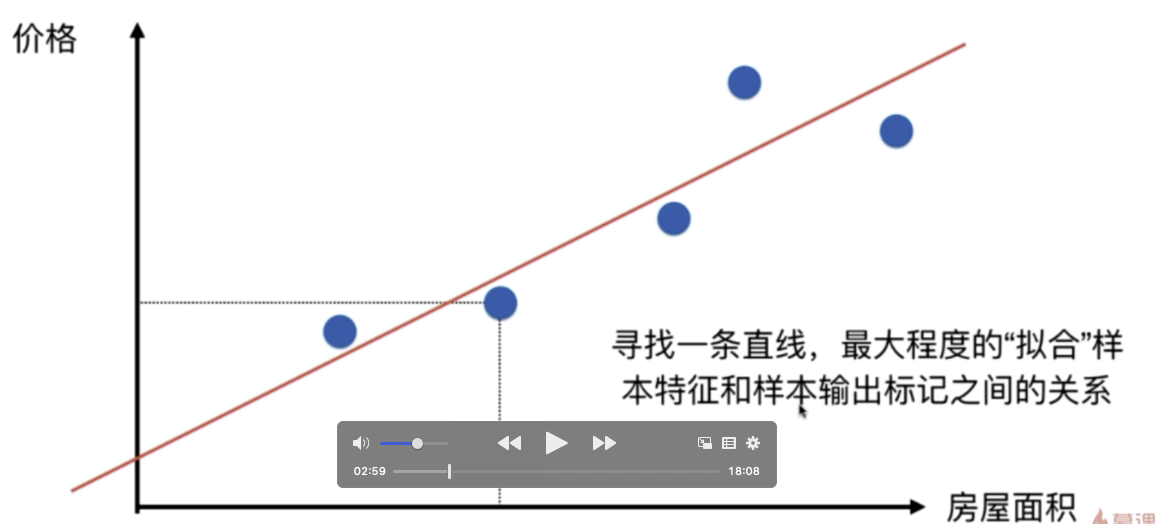

- 和分类问题的区别
- 分类问题 axis两个都是分类的特征
- x：是特征  房屋面积  y：价格是 输出标记
- 若是两个特征的回归问题 需要在3D中查看
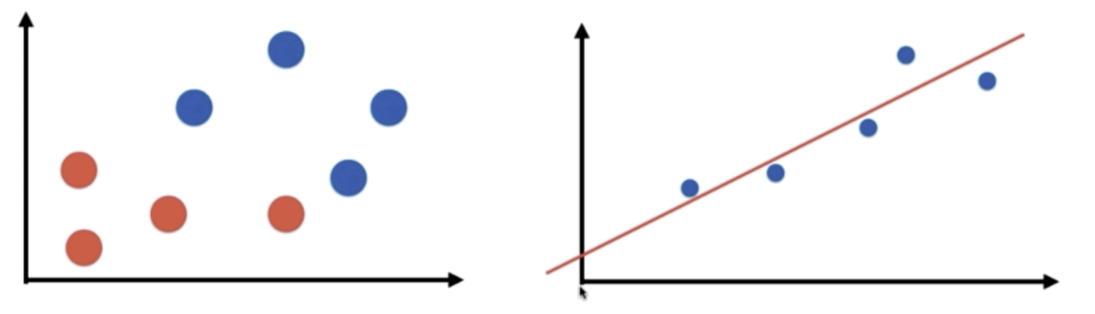

## 简单线性回归
- 样本特征只有一个，称为简单线性回归
- 样本特征有多个 多元线性回归

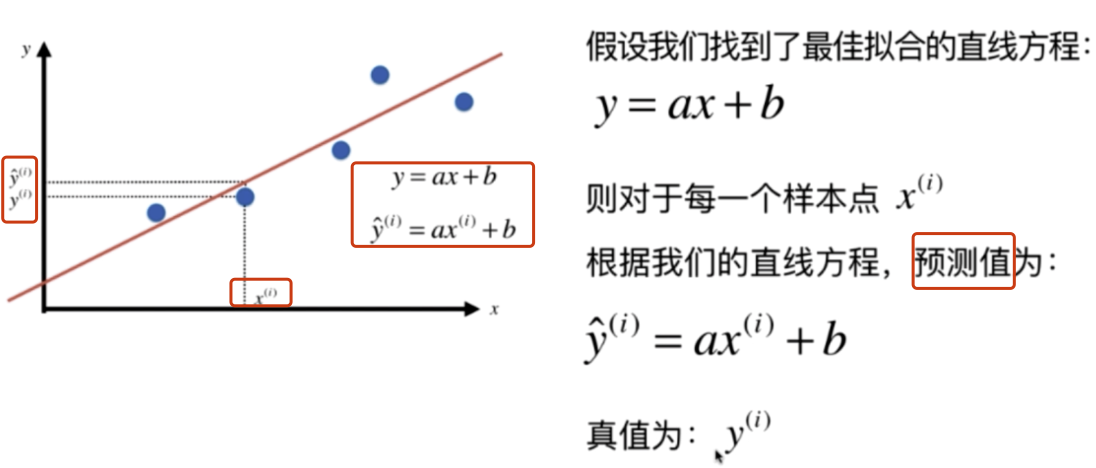
- 最佳拟合直线方程：$y = ax + b$
- 对于每一个样本点 $x^{(i)}$(第i个样本点) 
- 根据直线方程 预测值$\hat{y}^{(i)} = ax^{(i)} + b$
- 真值：$y^{(i)}$
- 希望 $y^{(i)}$ $\hat{y}^{(i)}$差距最小
- 由于绝对值不可导 $(y^{(i)} - \hat{y}^{(i)})^{2}$
- 考虑所有样本：$\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)} )^{2}$ 使得其尽可能小

- $\sum_{i=1}^{m}(y^{(i)} - ax^{(i)} - b )^{2}$ 尽可能小 -> 损失函数(loss function) 效用函数(utility function)

- 通过分析问题 确定问题的损失函数或者效用函数
- 通过最优化损失或者效用函数 获得机器学习模型
- 近乎所有参数学习算法都是这个套路:（线性回归 多项式回归 逻辑回归 SVM 神经网络 ...）
- 本质就是 **<font color=red>最优化原理 凸优化原理</font>**
- 典型的最小二乘法问题:最小化误差的平方

#### 公式：
$a = \frac{\sum_{i=1}^{m}(x^{(i)-\bar{x}})(y^{(i)} - \bar{y})}{\sum_{i=1}^{m}(x^{(i)} - \bar{x})^{2}}$

$b = \bar{y} - a\bar{x}$

## 5.2最小二乘法推导

### 目标：找到a和b 使得$\sum_{i=1}^{m}(y^{(i)} - ax^{(i)} - b)^{2}$尽可能小
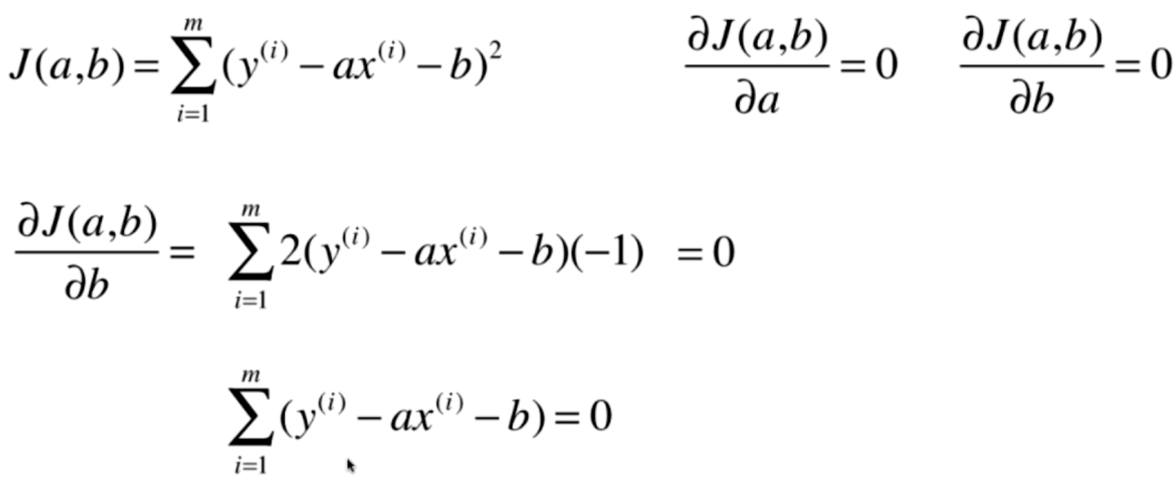

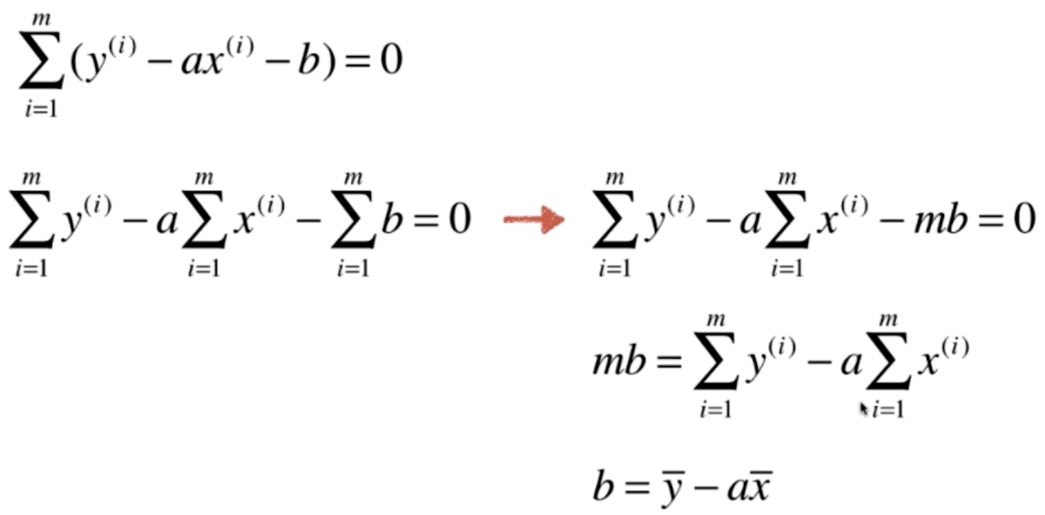

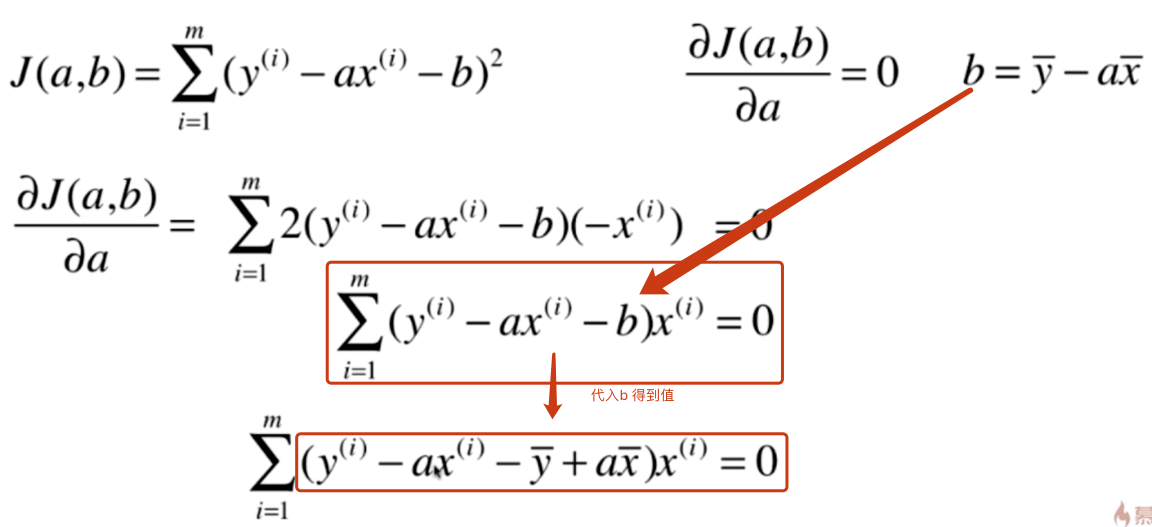

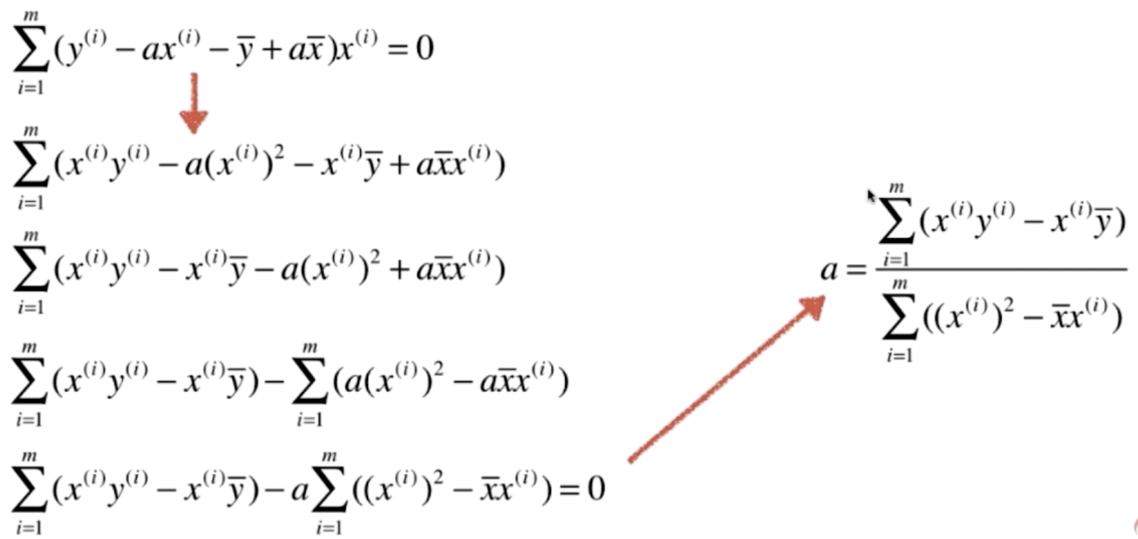

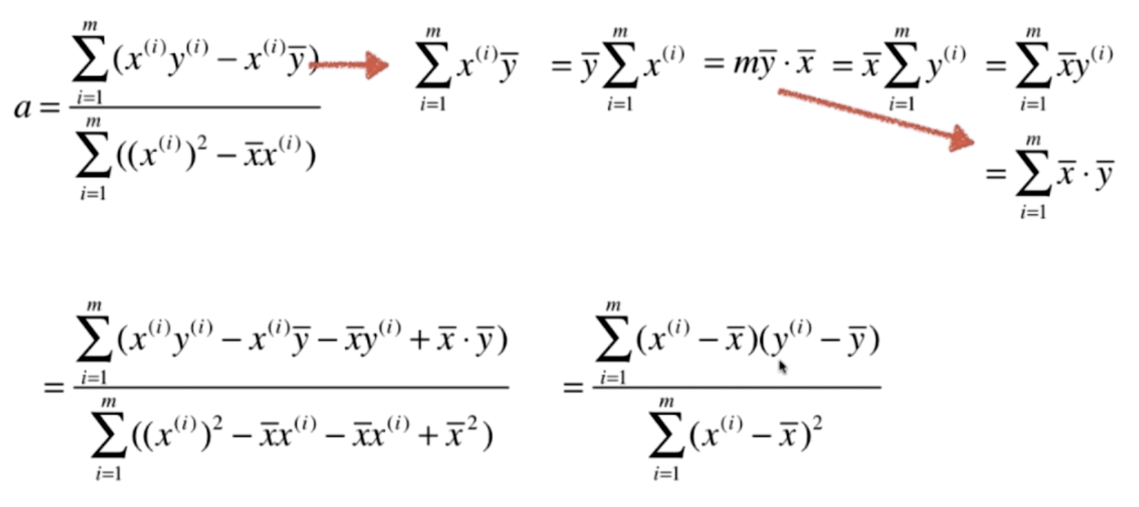

### 5.3 简单的线性回归实现 - 实现 Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(1,6,dtype=float)
y = np.array([1.,3.,2.,3.,5.])

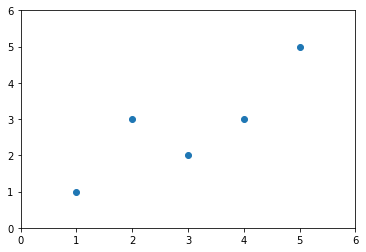

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6])###显示横纵坐标的范围
plt.show()

#### 公式：
$a = \frac{\sum_{i=1}^{m}(x^{(i)-\bar{x}})(y^{(i)} - \bar{y})}{\sum_{i=1}^{m}(x^{(i)} - \bar{x})^{2}}$

$b = \bar{y} - a\bar{x}$

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0
d  = 0.0
#每次从x y取出一个值
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean) *(y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num /d
b = y_mean - a * x_mean

In [7]:
print("a:",a)
print("b:",b)

a: 0.8
b: 0.39999999999999947


In [8]:
y_hat = a*x + b

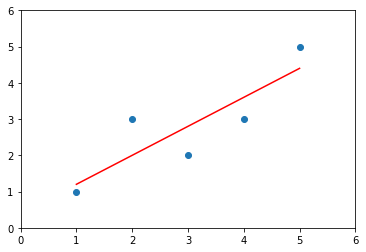

In [9]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')
plt.axis([0,6,0,6])
plt.show()

In [10]:
x_predict = 6 
y_predict = a*x_predict + b

In [11]:
y_predict

5.2

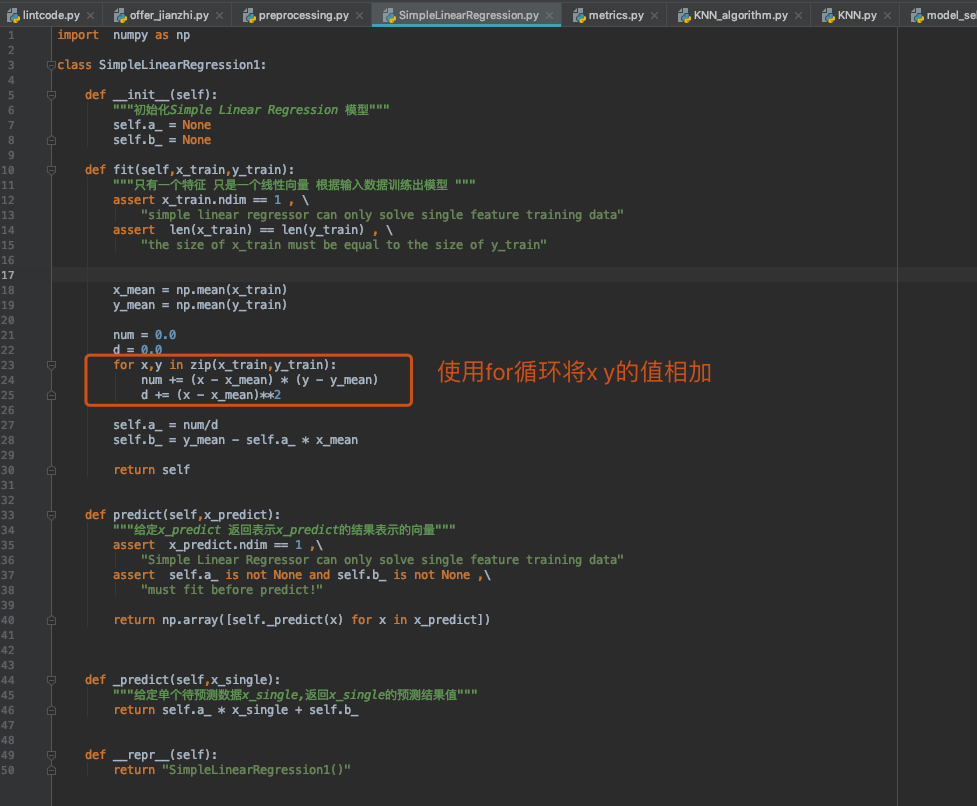

### 使用自己的函数SimpleLinearRegression

In [12]:
from ML_learning.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x,y)

SimpleLinearRegression1()

In [13]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
print('a_:',reg1.a_)
print("b_:",reg1.b_)

a_: 0.8
b_: 0.39999999999999947


In [15]:
y_hat1 = reg1.predict(x)

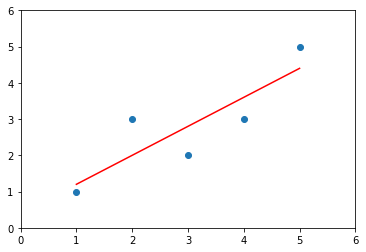

In [16]:
plt.scatter(x,y)
plt.plot(x,y_hat1,color='r')
plt.axis([0,6,0,6])
plt.show()

### 5.4向量化

### 原始式子a：
$a = \frac{\sum_{i=1}^{m}(x^{(i)-\bar{x}}) (y^{(i)} - \bar{y})}{\sum_{i=1}^{m}(x^{(i)} - \bar{x})^{2}}$
- 对应的$w$和$v$两个向量
$\sum_{i=1}^{m}w^{(i)}.v^{(i)}$
- 对应结果 相乘再相加
- $w = (w^{(1)},w^{(2)},...,w^{m})$
- $v = (v^{(1)},v^{(2)},...,v^{m})$
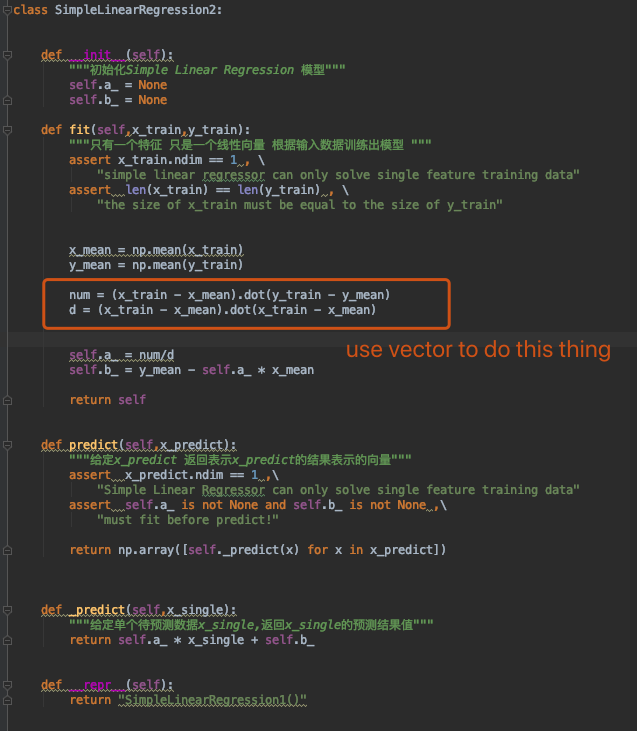

### 向量化实现SimplelinearRegression

In [17]:
from ML_learning.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x,y)

SimpleLinearRegression1()

In [18]:
reg2.predict(np.array([x_predict]))

array([5.2])

In [19]:
y_hat2  = reg2.predict(x)
#y_hat2 需要给为预测值

In [20]:
y_hat2

array([1.2, 2. , 2.8, 3.6, 4.4])

In [21]:
print('a:',reg2.a_)
print('b:',reg2.b_)

a: 0.8
b: 0.39999999999999947


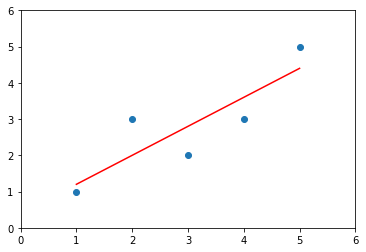

In [22]:
plt.scatter(x,y)
plt.plot(x,y_hat2,color='r')
plt.axis([0,6,0,6])
plt.show()

### 向量化实现的性能测试

In [23]:
m = 1000000
big_x = np.random.random(size = m)
big_y = big_x*2.0 + 3.0 + np.random.normal(size=m)

In [24]:
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

814 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.87 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
print(reg1.a_)
print(reg1.b_)

1.995768366103465
3.0032014533346056


In [26]:
print(reg2.a_)
print(reg2.b_)

1.9957683661034586
3.0032014533346088


## 5.5衡量线性回归法的指标 MSE RMS MAE

### 简单线性回归:
- 目标：找到`a`和`b`，使得$\sum_{i=1}{m}(y_{train}^{(i)} - ax_{train}^{(i)} - b)^{2}$（  $\sum_{i=1}{m}(y_{train}^{(i)} - \hat{y}_{train}^{(i)})^{2}$  ）尽可能小
- $\hat{y}_{test}^{(i)} = ax_{test}^{(i)} + b$ 衡量标准： $\sum_{i=1}^{m}(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^{2}$

- 衡量标准不能通过结果来判断 有样本的大小区别

- 均方误差 MSE(Mean Squared Error)  $\frac{1}{m}\sum_{i=1}^{m}(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^{2}$  标准单位会不一致 若为w 结果$w^{2}$

- 均方根误差 RMSE(Root Mean Squared Error) $\sqrt{MSE_{test}}$ = $\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^{2}}$

- 平均绝对误差(Mean Absolute Error)MAE $\frac{1}{m}\sum_{i=1}^{m}|y_{test}^{(i)} - \hat{y}_{test}^{(i)}|$

## 05衡量回归算法的标准

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [28]:
boston = datasets.load_boston()

In [29]:
print(boston.DESCR)
#一共有13个特性 506个值

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
#RM 每个house有多少room
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
x = boston.data[:,5]

In [32]:
x.shape

(506,)

In [33]:
y = boston.target

In [34]:
y.shape

(506,)

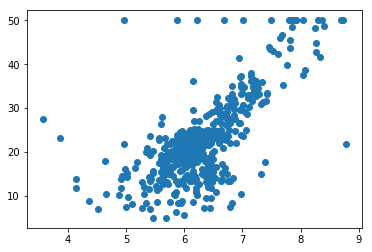

In [35]:
plt.scatter(x,y)
plt.show()

#### 上述图片有上限 可能是因为测量仪器等原因采集上限点 50  将这些值删除

In [36]:
np.max(y)

50.0

In [37]:
##使用boolean值向量 作为索引
x = x[y < 50]
y = y[y < 50]

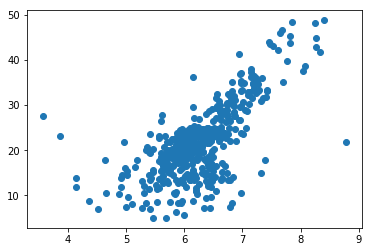

In [38]:
plt.scatter(x,y)
plt.show()

### 使用简单线性回归法

In [39]:
from ML_learning.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,seed=667)

In [40]:
x_train.shape

(392,)

In [41]:
x_test.shape

(98,)

In [42]:
from ML_learning.SimpleLinearRegression import SimpleLinearRegression2

In [43]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression1()

In [44]:
reg.a_

7.904943308812039

In [45]:
reg.b_

-27.712483684154474

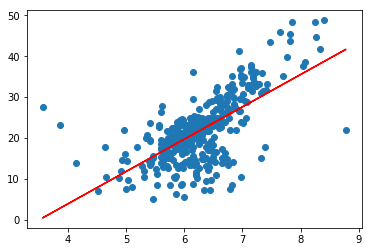

In [46]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.show()

In [47]:
y_predict = reg.predict(x_test)

### MSE
- 缺点：只知道数据大小 不知道数据量纲是什么样子的

In [48]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

26.640726841219955

### RMSE
- 预测误差在5.1w dollar

In [49]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.161465571058278

### MAE

In [50]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.960507442303732

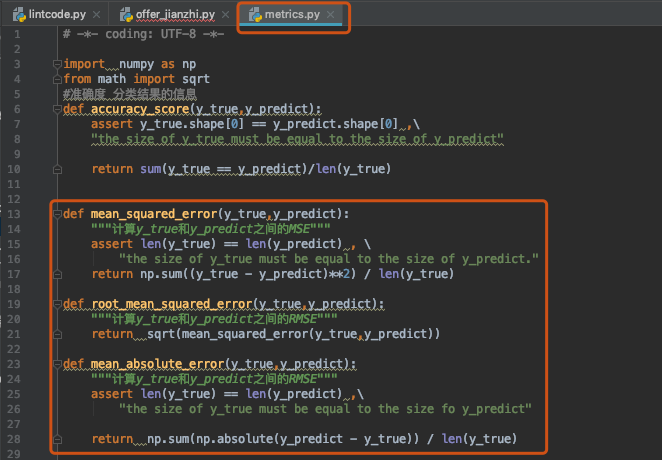

In [51]:
from ML_learning.metrics import mean_absolute_error
from ML_learning.metrics import  mean_squared_error
from ML_learning.metrics import  root_mean_squared_error

In [52]:
mean_squared_error(y_test,y_predict)

26.640726841219955

In [53]:
root_mean_squared_error(y_test,y_predict)

5.161465571058278

In [54]:
mean_absolute_error(y_test,y_predict)

3.960507442303732

### scikit-learn中的MSE和MAE

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test,y_predict)

26.640726841219955

In [57]:
mean_absolute_error(y_test,y_predict)

3.960507442303732

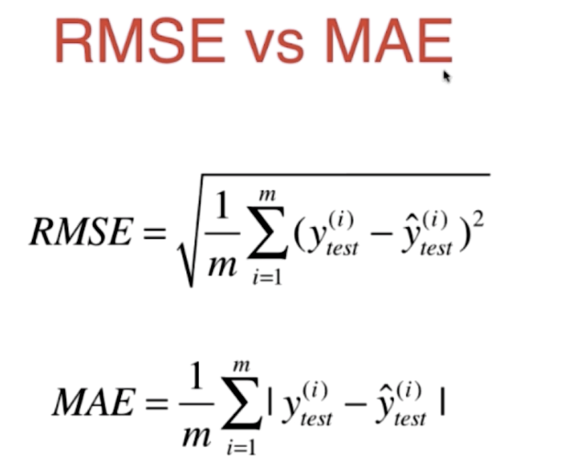
- RMSE > MAE

 ## 5.6最好的线性回归算法评价指标 `r square`

- 评价回归算法 `R Square`

- RMSE = $\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^{2}}$
- MAE = $\frac{1}{m}\sum_{i=1}{m}|y_{test}^{(i)} - \hat{y}_{test}^{(i)}|$
- 分类的准确度：`[0,1]` 1 best 0 bad
- can't use MAE & RMSE to judge  , use R Squared
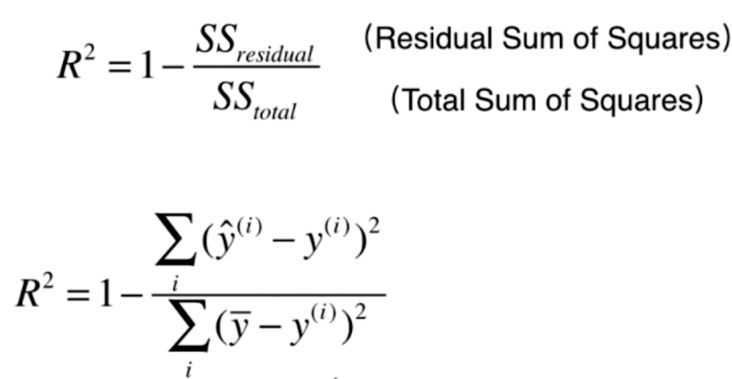

- HOW TO UNDERSTAND R Squared
  - numerator：使用我们的模型预测产生的误差$\sum_{i}(\hat{y}^{(i)} - y^{(i)})^{2}$
  - denominator $\sum_{i}(\bar{y} - y^{(i)})^{2}$  使用$y = \hat{y}$预测产生的错误  baseline model
  - baseline model：错误大 不考虑每个x 预测所有样本输出均值

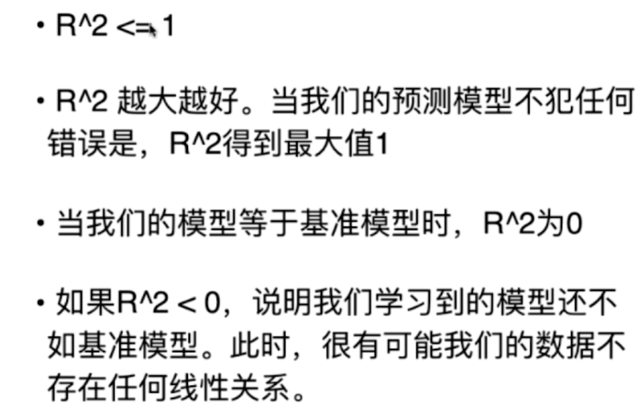
- $R^{2} < 0 $ 不需要使用线性回归法

- $R^{2} = 1 - \frac{\sum_{i}(\hat{y}^{(i)} - y^{(i)})^{2}}{\sum_{i}(\bar{y} - y^{(i)})^{2}}$ = 1 - $\frac{(\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^{2})/m}{(\sum_{i=1}{m}(y^{(i)} - \bar{y})^{2})/m}$ 
=  1 - $\frac{MSE(\hat{y},y)}{Var(y)}$
- $Var(y)$ 方差

### R Square

In [58]:
1 - mean_squared_error(y_predict,y_test)/np.var(y_test)

0.5965868889051696

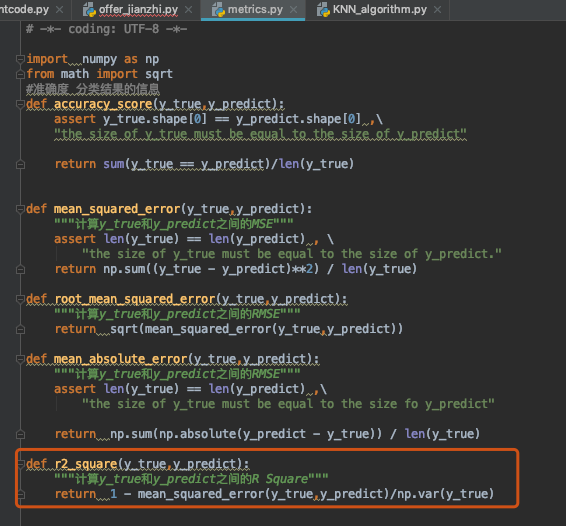

In [59]:
from ML_learning.metrics import r2_square

In [60]:
r2_square(y_test,y_predict)

0.5965868889051696

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5965868889051698

#### 线性回归被封装在linearRegression中

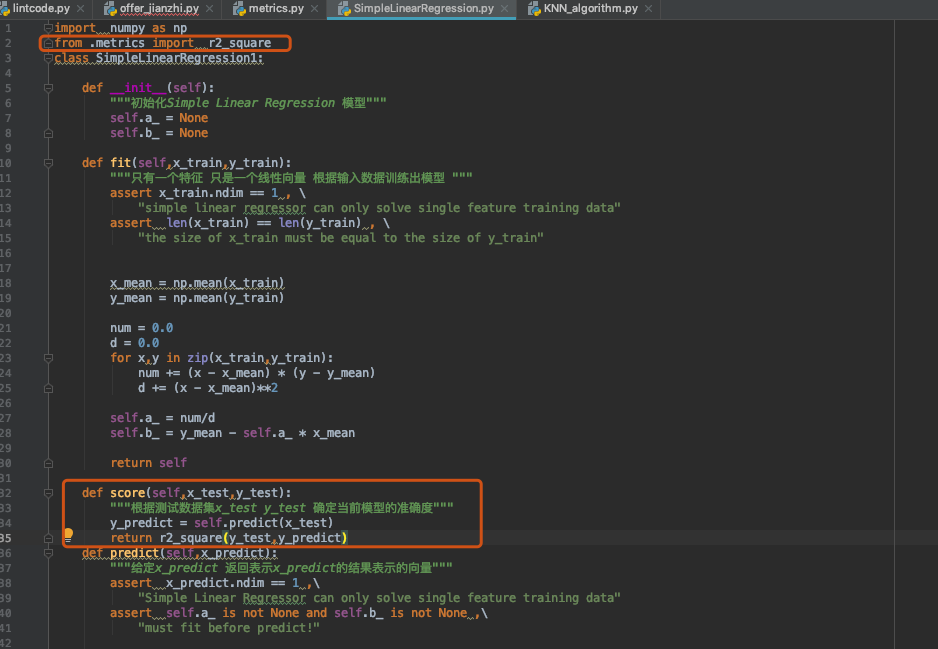

In [65]:
reg.score(x_test,y_test)

0.5965868889051696

In [64]:
y_test

array([34.6, 21.5,  7.2, 11.5,  7. , 19.9, 21.7, 23.1, 20.6, 19.8, 16.7,
       21.9,  8.3, 20. , 14.8,  8.8, 20.5, 21.7, 15.3, 24.8, 13.3, 31.1,
       43.1, 13.8, 35.4, 11.8, 20.8, 23.3, 21.4, 16.8, 24.5, 11.9, 44. ,
       21.1, 42.3, 17.1, 22.3, 24.4, 16.1, 11.9, 13.4, 22.5, 19.1, 21.4,
        8.3, 11.7, 30.8, 36.5, 16.8, 27.1, 22. , 23.5, 33.4, 31.2, 21. ,
       22.2, 33.1, 19.6, 30.3, 19.3, 23.2, 14.5, 17.8, 20.2, 46.7, 19.7,
       22. , 23.1, 18.4, 17.3, 24.4, 17.5, 24. , 20.3, 26.5,  5. , 28.5,
       28.4, 20.5, 18.1, 42.8, 24.3, 19.8, 19.5, 19.5, 22.8, 13.6, 18.5,
       16.3, 15.6, 21.7, 13.1, 24.6, 28. , 23.7, 15.2, 19.9, 25. ])